[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MikeS96/cv_dl/blob/main/week3/S3L1_ANN.ipynb)

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /content/cats_and_dogs_filtered.zip

--2021-02-27 12:01:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   108MB/s    in 0.6s    

2021-02-27 12:01:27 (108 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!pip install rich

     |████████████████████████████████| 204kB 7.6MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 


### Descomprimir el ZIP y llevarlo a una carpeta

In [ ]:
import os
import zipfile

comprimido = zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r')
comprimido.extractall()
comprimido.close()

### Exploring folders

In [ ]:
from rich import print

# Obs folders
dir_base = 'cats_and_dogs_filtered'
# Paths
dir_tra_cat = os.path.join(dir_base, 'train/cats')
dir_tra_dog = os.path.join(dir_base, 'train/dogs')
dir_val_cat = os.path.join(dir_base, 'validation/cats')
dir_val_dog = os.path.join(dir_base, 'validation/dogs')
# Printing
print('Listing training cat files: \n{} \n\n'.format(os.listdir(dir_tra_cat)[:10]))
print('Listing training dog files: \n{} \n\n'.format(os.listdir(dir_tra_dog)[:10]))
print('The number of cat images for training are: \n{} \n\n'.format(len(os.listdir(dir_tra_cat))))
print('The number of dog images for training are: \n{}'.format(len(os.listdir(dir_tra_dog))))

Listing training cat files: 
['cat.209.jpg', 'cat.189.jpg', 'cat.894.jpg', 'cat.831.jpg', 'cat.796.jpg', 
'cat.457.jpg', 'cat.824.jpg', 'cat.307.jpg', 'cat.167.jpg', 'cat.36.jpg'] 


Listing training dog files: 
['dog.728.jpg', 'dog.699.jpg', 'dog.715.jpg', 'dog.262.jpg', 'dog.998.jpg', 
'dog.814.jpg', 'dog.336.jpg', 'dog.36.jpg', 'dog.986.jpg', 'dog.211.jpg'] 


The number of cat images for training are: 
1000 


The number of dog images for training are: 
1000


In [ ]:
from skimage.feature import hog, local_binary_pattern
from skimage.io import imread
from skimage.transform  import resize
from skimage.color import rgb2gray

from matplotlib import pyplot as plt
import numpy as np

### Preprocessing

In [ ]:
# Process each image
def preprocesado(file):
  img = imread(file)
  img_g = rgb2gray(img)
  img_r = resize(img_g, (128, 64))
  fd, hog_img = hog(img_r, orientations = 9, pixels_per_cell = (16,16),
                   cells_per_block = (4,4), visualize = True )
  return fd

In [ ]:
# Testing the last method
nfile = dir_tra_cat + '/cat.153.jpg'
fd = preprocesado(nfile)
print('The number of features are: {}'.format(fd.size))

The number of features are: 720


### Processing training examples

In [ ]:
def process_all(path, class_label):
  hog_features = []
  label = []
  labels = {'cat': 1, 'dog': 0}
  # For each file in the folder...
  for file in os.listdir(path):
    nfile = path + '/' + file
    his = preprocesado(nfile)
    hog_features.append(his)
    # Cats will be tagged with -> 1
    label.append(labels[class_label])
  return hog_features, label

In [ ]:
# Processing cats
hog_features_cat, label_cat = process_all(dir_tra_cat, 'cat')
hog_features_dog, label_dog = process_all(dir_tra_dog, 'dog')

In [ ]:
# Concatenating features
hog_features = hog_features_cat + hog_features_dog
labels = label_cat + label_dog

In [ ]:
# Parsing to numpy array
hog_features = np.array(hog_features)
labels = np.array(labels)
print('The size of the features are: {}'.format(hog_features.shape))
print('The size of the targets are: {}'.format(labels.shape))

The size of the features are: (2000, 720)
The size of the targets are: (2000,)


In [ ]:
# Generating the dataset
dataset = np.hstack((hog_features, labels.reshape(2000, -1)))
print('The final shape of the dataset is: {}'.format(dataset.shape))

The final shape of the dataset is: (2000, 721)


In [ ]:
# Shuffling dataset
np.random.shuffle(dataset)

### Splitting dataset

In [ ]:
# Splitting manually
# Percentage of training
training_ratio = 0.8
training_samples = int(len(hog_features) * training_ratio)
# Splitting dataset
x_train, y_train = dataset[:training_samples, :-1], dataset[:training_samples, -1].ravel()
x_test, y_test = dataset[training_samples:, :-1], dataset[training_samples:, -1].ravel()

print('The training samples shape are: {}'.format(x_train.shape))
print('The target samples for training are: {}\n'.format(y_train.shape))
print('The test samples shape are: {}'.format(x_test.shape))
print('The target samples for testing are: {}'.format(y_test.shape))

The training samples shape are: (1600, 720)
The target samples for training are: (1600,)

The test samples shape are: (400, 720)
The target samples for testing are: (400,)


In [ ]:
# Splitting with train text split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hog_features, labels, test_size = 0.2)
# Printting
print('The training samples shape are: {}'.format(x_train.shape))
print('The target samples for training are: {}\n'.format(y_train.shape))
print('The test samples shape are: {}'.format(x_test.shape))
print('The target samples for testing are: {}'.format(y_test.shape))

The training samples shape are: (1600, 720)
The target samples for training are: (1600,)

The test samples shape are: (400, 720)
The target samples for testing are: (400,)


### Training and validating

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Training
mlp = MLPClassifier(hidden_layer_sizes = (256, 128, 64, 32), activation = 'relu',
                    solver = 'adam', random_state = 1).fit(x_train, y_train)
# Testing
y_pred = mlp.predict(x_test)
print('The test accuracy is: {}'.format(mlp.score(x_test, y_test)))

The test accuracy is: 0.695


### Plotting confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

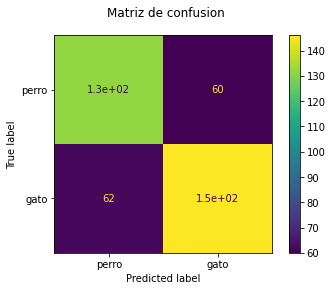

In [ ]:
mc = plot_confusion_matrix(mlp, x_test, y_test, display_labels = ['perro', 'gato'])
mc.figure_.suptitle('Matriz de confusion')
plt.show()

### Saving the model

In [ ]:
import pickle as pkl

In [ ]:
# Saving model
pkl.dump(mlp, open('catsdogs.sav', 'wb'))

In [ ]:
# Printing validation images
print('Listing validation files for dogs: \n{}'.format(os.listdir(dir_val_dog)[:10]))

Listing validation files for dogs: 
['dog.2049.jpg', 'dog.2108.jpg', 'dog.2164.jpg', 'dog.2103.jpg', 'dog.2208.jpg',
'dog.2090.jpg', 'dog.2083.jpg', 'dog.2446.jpg', 'dog.2182.jpg', 'dog.2416.jpg']


### Validating the model

In [ ]:
# Path to file
valfile = dir_val_dog + '/' + 'dog.2164.jpg'
# Doggo label
true_label = 0
# Processing
his = preprocesado(valfile)
his = np.array(his).reshape(1, -1)
print('The shape of the histogram is: {}'.format(his.shape))

The shape of the histogram is: (1, 720)


In [ ]:
mlp_stored = pkl.load(open('catsdogs.sav', 'rb'))
resultado = mlp_stored.predict(his)
print(resultado)

[0]
